In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels as sts
from tqdm.notebook import tqdm

plt.style.use('ggplot')

1. В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия эффективна?


In [ ]:
data = pd.read_csv("anorexia.txt" , sep = '\t')

In [ ]:
data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


Используем Т-критерий Стьюдента для разности двух средних зависимых выборок. Сформулируем гипотезы:

H(0) - M1 = M2

H(a) - M2 > M1

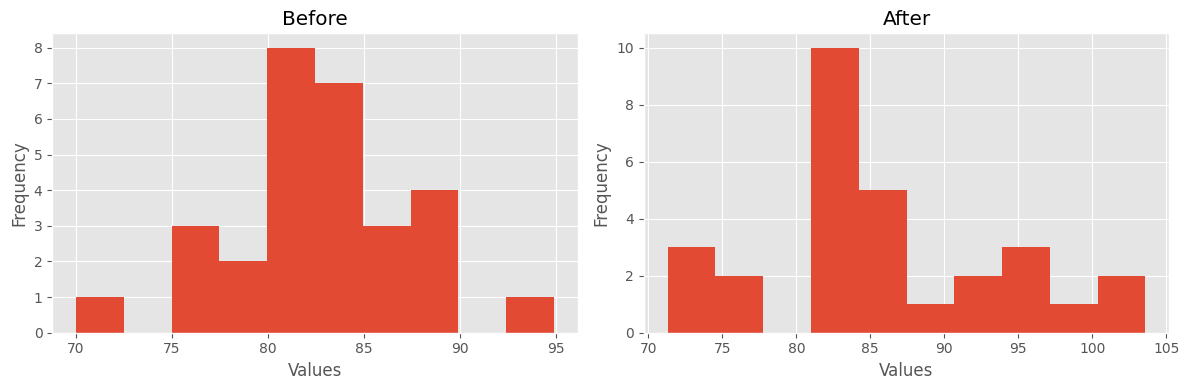

In [ ]:
# Сначала посмотрим на то как распределены выборки, чтобы мы могли провести свой тест,
# нам необходимо, чтобы данные были нормально распределены
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axes[0].hist(data['Before'], bins= 10)
axes[1].hist(data['After'], bins = 10)
for ax in axes:
  ax.set_xlabel("Values")
  ax.set_ylabel("Frequency")
axes[0].set_title("Before")
axes[1].set_title("After")
plt.tight_layout()
plt.show()

In [ ]:
n = len(data)
data["Difference"] = (data["After"] - data["Before"])
data.Difference.head()

,Difference
0,1.7
1,0.7
2,-0.1
3,-0.7
4,-3.5


In [ ]:
E_A = np.mean(data["After"])
E_B = np.mean(data["Before"])
DE = E_A - E_B
S = (1/(n-1)) * np.sum((data.Difference - DE)**2)

In [ ]:
z_obs = (DE - 0)/np.sqrt(S/n)
z = stats.t.ppf(1 - 0.05, n-1)

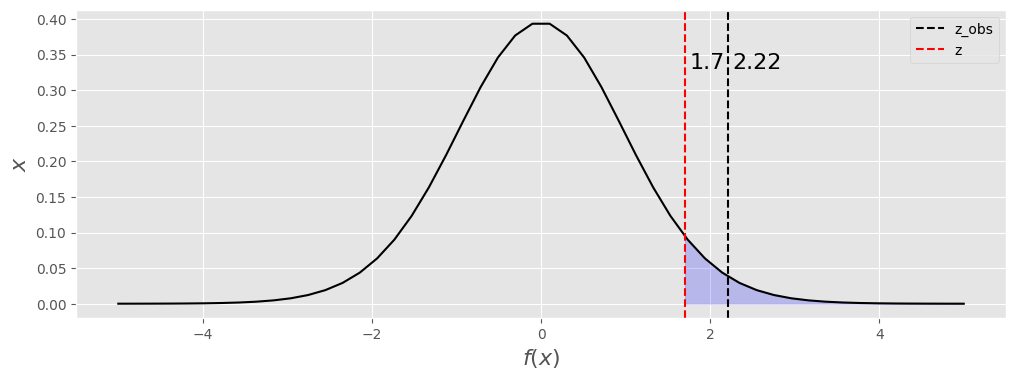

In [ ]:
#Построим график
x = np.linspace(-5,5)
t = stats.t(n-1).pdf(x)
plt.figure(figsize=(12,4))
plt.plot(x, t, color = "black")
plt.xlabel("$f(x)$", fontsize = 16)
plt.ylabel("$x$", fontsize = 16)
y_max = plt.ylim()[1]
plt.axvline(z_obs, color= "black", linestyle="--", label = "z_obs")
plt.axvline(z, color= "red", linestyle="--", label = "z" )
plt.fill_between(np.linspace(z, 5, 50),0,stats.t(n-1).pdf(np.linspace(z, 5)), color = "blue", alpha = 0.2 )
# Наблюдаемое значение
plt.text(z_obs+0.05, 0.8* y_max, round(z_obs, 2), color = "black", fontsize = 16)
# Граница
plt.text(z +0.05, 0.8* y_max, round(z, 2), color = "black", fontsize = 16)
plt.legend()
plt.show()

Вывод: первая гипотеза отвергается, а значит терапия действительно могла помочь людям набрать вес

2.В файле seattle.txt записаны цены на недвижимость в одном из районов
Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно).
Изменились ли в среднем цены в этом районе за год?

In [4]:
data1 = pd.read_csv( 'seattle.txt' , sep = '\t')
data1.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


Сформулируем гипотезы:

H(0) - M1 = M2

H(A) - M1 != M2


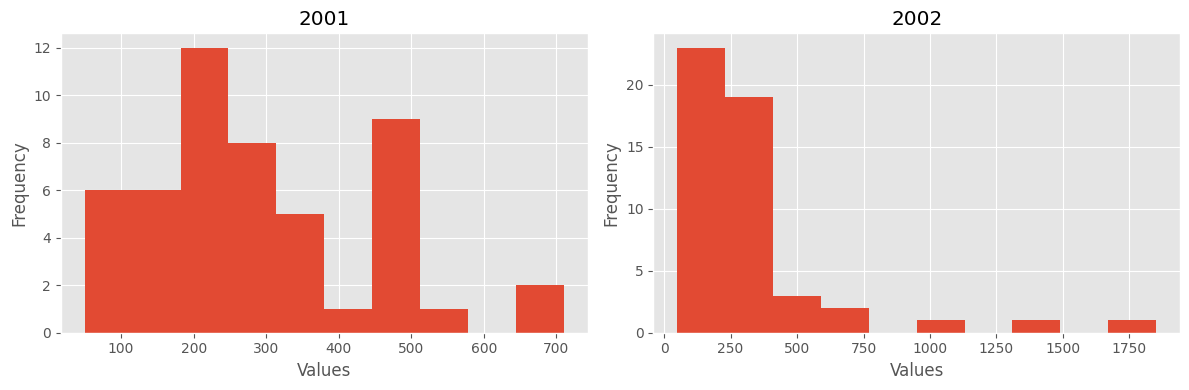

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axes[0].hist(data1[data1['Year'] == 2001]["Price"], bins= 10)
axes[1].hist(data1[data1['Year'] == 2002]['Price'], bins = 10)
for ax in axes:
  ax.set_xlabel("Values")
  ax.set_ylabel("Frequency")
axes[0].set_title("2001")
axes[1].set_title("2002")
plt.tight_layout()
plt.show()

Как видно на графике, данные распределены неравномерно. Значит будем пользоваться асимптотическим z-тестом, так как выборки независимые

In [11]:
from statsmodels.stats.weightstats import ztest
ztest(data1[data1['Year'] == 2001]["Price"], data1[data1['Year'] == 2002]['Price'], value = 0 )

(-0.8057258725189664, 0.4204009280147024)

Значениe P-value составляет 0.42, что значительно выше требуемых 0.05 для проверки гипотезы. Соотвественно, мы можем утверждать, что гипотеза о том, что данные не противоречат гипотезе о том, что среднее не поменялось.

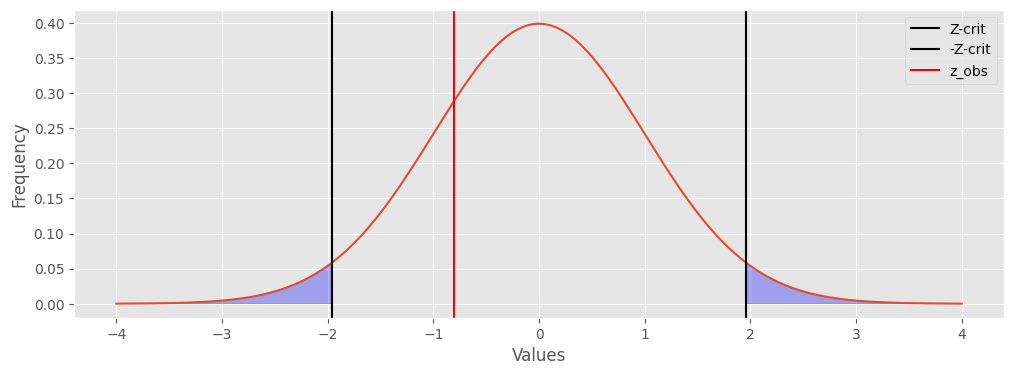

In [18]:
# Визуализируем статистику
z_obs, p_value = ztest(data1[data1['Year'] == 2001]["Price"], data1[data1['Year'] == 2002]['Price'], value = 0 )

x = np.linspace(-4,4, 1000)
y = stats.norm.pdf(x)

alpha = 0.05
z_crit = stats.norm.ppf(1 - alpha/2)
plt.figure(figsize = (12, 4))
plt.plot(x,y)
plt.fill_between(x, y, where = ((x > z_crit)| (x < -z_crit)), color = "blue", alpha = 0.3)
plt.axvline(z_crit, color="black", label = "Z-crit")
plt.axvline(-z_crit, color="black", label = "-Z-crit")
plt.axvline(z_obs, color="red", label = "z_obs")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()


3.В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности в течение недели принимали
либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест
на способность к подавлению импульсивных поведенческих реакций. На втором этапе
плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест. Был ли эффект от применения препарата? Данные находятся в
файле methylphenidate.txt

In [21]:
data2 = pd.read_csv("methylphenidate.txt" , sep = "\t")
data2.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


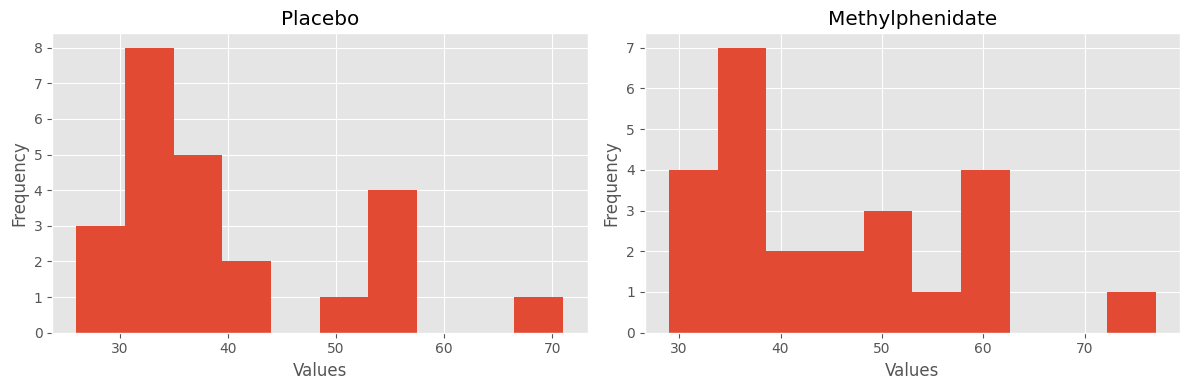

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axes[0].hist(data2['Placebo'], bins= 10)
axes[1].hist(data2['Methylphenidate'], bins = 10)
for ax in axes:
  ax.set_xlabel("Values")
  ax.set_ylabel("Frequency")
axes[0].set_title("Placebo")
axes[1].set_title("Methylphenidate")
plt.tight_layout()
plt.show()

Используем Т-критерий Стьюдента для разности двух средних зависимых выборок. Сформулируем гипотезы:

H(0) - M1 = M2

H(a) - M2 != M1



In [23]:
stats.ttest_rel(data2['Placebo'],data2['Methylphenidate'] )

TtestResult(statistic=-3.222362445123041, pvalue=0.003771488176381471, df=23)

Значениe P-value составляет 0.003, что значительно ниже требуемых 0.05 для проверки гипотезы. Соотвественно, мы можем утверждать
, что данные противоречат гипотезе о том, что среднее не поменялось.




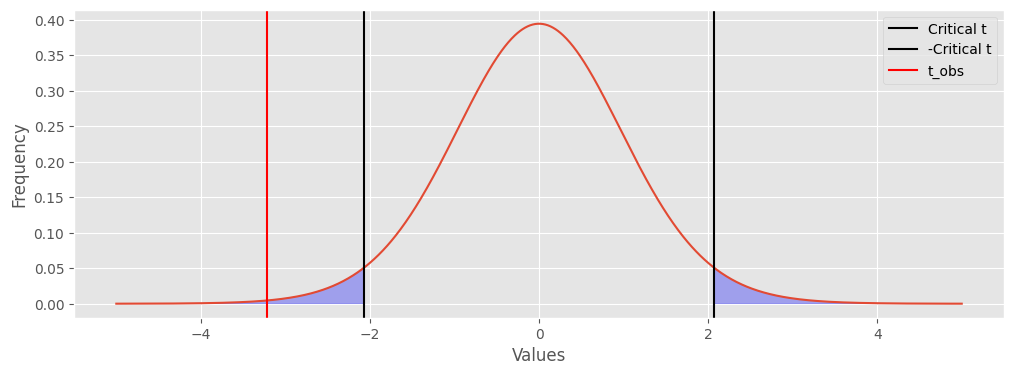

In [25]:
# Визуализируем статистику
t_obs, p_value = stats.ttest_rel(data2['Placebo'],data2['Methylphenidate'] )
x = np.linspace(-5,5, 1000)
y = stats.t.pdf(x, df=len(data2['Placebo']) - 1)

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=len(data2['Placebo']) - 1)
plt.figure(figsize = (12, 4))
plt.plot(x,y)
plt.fill_between(x, y, where = ((x > t_crit)| (x < -t_crit)), color = "blue", alpha = 0.3)
plt.axvline(t_crit, color="black", label = "Critical t")
plt.axvline(-t_crit, color="black", label = "-Critical t")
plt.axvline(t_obs, color="red", label = "t_obs")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()


4.В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974
года. Они описывают расхоцы:
• mpg — расходд топлива в зависимости от 10 характеристик автомобиля
(все автомобили 1973-1974 года). Нас будут интересовать столб топлива (миль/галлон);
• vs — тип двигателя (0 = V-образный, 1 = рядный);
• am — тип коробки передач (0 = автоматическая, 1 = ручная).
Ответьте на следующие вопросы:
• (20 баллов) Влияет ли тип двигателя на расход топлива?
• (20 баллов) Влияет ли тип коробки передач?


In [3]:
data3 = pd.read_csv('mtcars.csv')
data3.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


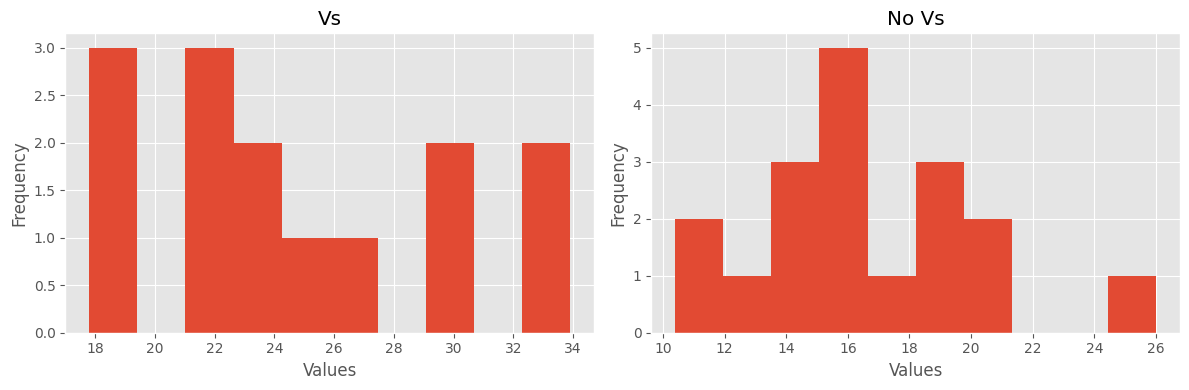

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axes[0].hist(data3[data3['vs'] == 1]['mpg'], bins= 10)
axes[1].hist(data3[data3['vs'] == 0]['mpg'], bins = 10)
for ax in axes:
  ax.set_xlabel("Values")
  ax.set_ylabel("Frequency")
axes[0].set_title("Vs")
axes[1].set_title("No Vs")
plt.tight_layout()
plt.show()

Сформулируем гипотезы:

H(0) - M1 = M2

H(A) - M1 != M2

In [11]:
from statsmodels.stats.weightstats import ztest
ztest(data3[data3['vs'] == 1]['mpg'], data3[data3['vs'] == 0]['mpg'], value= 0)


(4.864384956122782, 1.1481326360719998e-06)

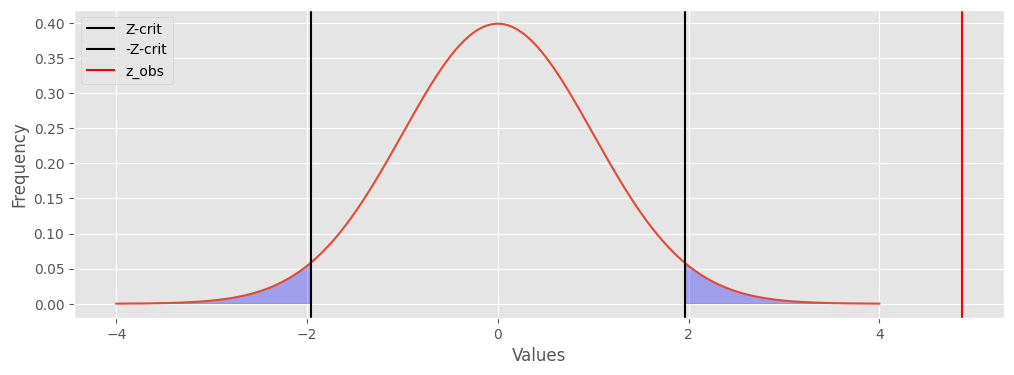

In [12]:
z_obs, p_value = ztest(data3[data3['vs'] == 1]['mpg'], data3[data3['vs'] == 0]['mpg'], value = 0 )

x = np.linspace(-4,4, 1000)
y = stats.norm.pdf(x)

alpha = 0.05
z_crit = stats.norm.ppf(1 - alpha/2)
plt.figure(figsize = (12, 4))
plt.plot(x,y)
plt.fill_between(x, y, where = ((x > z_crit)| (x < -z_crit)), color = "blue", alpha = 0.3)
plt.axvline(z_crit, color="black", label = "Z-crit")
plt.axvline(-z_crit, color="black", label = "-Z-crit")
plt.axvline(z_obs, color="red", label = "z_obs")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Данные показывают, что тип двигателя влияет на расход топлива, так как гипотеза о равенстве средних была отвергнута

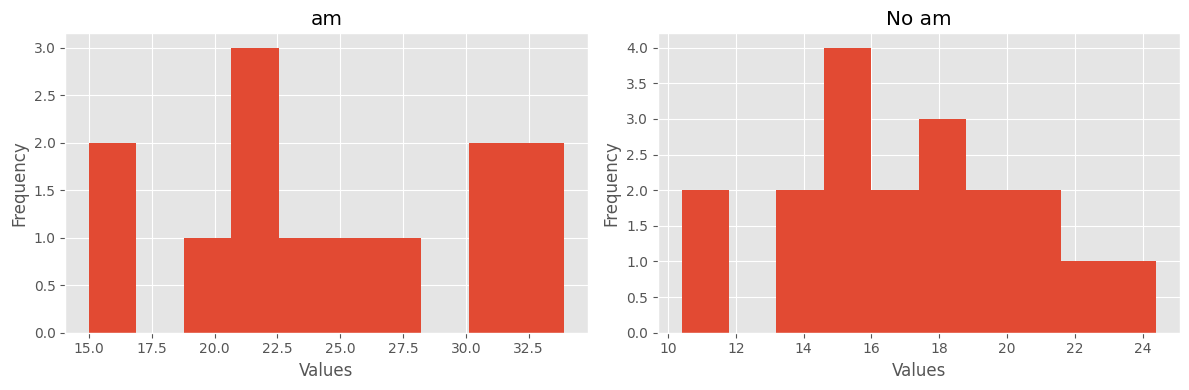

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axes[0].hist(data3[data3['am'] == 1]['mpg'], bins= 10)
axes[1].hist(data3[data3['am'] == 0]['mpg'], bins = 10)
for ax in axes:
  ax.set_xlabel("Values")
  ax.set_ylabel("Frequency")
axes[0].set_title("am")
axes[1].set_title("No am")
plt.tight_layout()
plt.show()

Сформулируем гипотезы:

H(0) - M1 = M2

H(A) - M1 != M2

In [14]:
ztest(data3[data3['am'] == 1]['mpg'], data3[data3['am'] == 0]['mpg'], value= 0)

(4.106126983100689, 4.023483547916665e-05)

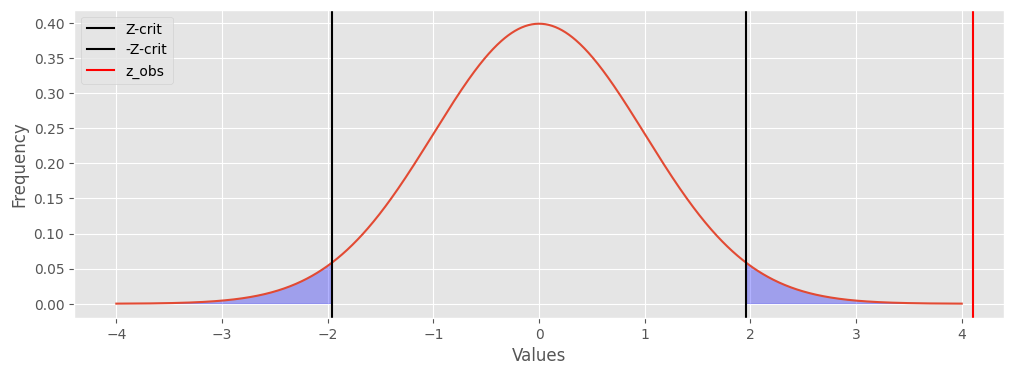

In [15]:
z_obs, p_value = ztest(data3[data3['am'] == 1]['mpg'], data3[data3['am'] == 0]['mpg'], value = 0 )

x = np.linspace(-4,4, 1000)
y = stats.norm.pdf(x)

alpha = 0.05
z_crit = stats.norm.ppf(1 - alpha/2)
plt.figure(figsize = (12, 4))
plt.plot(x,y)
plt.fill_between(x, y, where = ((x > z_crit)| (x < -z_crit)), color = "blue", alpha = 0.3)
plt.axvline(z_crit, color="black", label = "Z-crit")
plt.axvline(-z_crit, color="black", label = "-Z-crit")
plt.axvline(z_obs, color="red", label = "z_obs")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Данные показывают, что тип коробки передач влияет на расход
топлива, так как гипотеза о равенстве средних была отвергнута